#### 1. 관서명, 살인발생, ... <= 컬럼명

  | 관서명 | 살인발생 | 살인검거 |
  | ------ | ------| ------ |
  | 중부  |    2 |  2   |
 
#### 2. 관서명(구분)이 인덱스, 살인발생, ... 컬럼명 

       |살인발생|살인검거|
       | ------| ------ |
       |    2   |  2     |


In [2]:
# 위의 형태로 DataFrame이 나올 수 있도록 2017년 .csv을 읽어서 위의 형태로 구성하시오.

# 내가 한 거

In [3]:
import numpy as np
import pandas as pd

In [4]:
crime = pd.read_csv('../data/seoul_crime/2017.csv', encoding= 'Euc-Kr')
crime

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173
5,중부,강간,검거,87
6,중부,절도,발생,1061
7,중부,절도,검거,489
8,중부,폭력,발생,1198
9,중부,폭력,검거,1024


In [5]:
tmp = pd.pivot_table( crime, index=['구분','발생검거'])
tmp

건수
구분  발생검거        
강남  검거     623.4
    발생     954.6
강동  검거     649.0
    발생     852.2
강북  검거     564.8
    발생     678.6
강서  검거     785.4
    발생    1027.0
관악  검거     830.8
    발생    1105.0
광진  검거     657.8
    발생     929.2
구로  검거     681.6
    발생     979.0
금천  검거     514.4
    발생     653.0
남대문 검거     249.0
    발생     349.2
노원  검거     609.4
    발생     841.8
도봉  검거     330.4
    발생     399.8
동대문 검거     654.8
    발생     795.0
동작  검거     448.4
    발생     666.0
마포  검거     699.8
    발생    1055.6
방배  검거     141.8
    발생     189.8
...          ...
서부  검거     260.6
    발생     311.0
서초  검거     505.6
    발생     751.8
성동  검거     406.2
    발생     553.4
성북  검거     253.8
    발생     364.6
송파  검거     774.0
    발생    1115.2
수서  검거     440.8
    발생     589.4
양천  검거     532.0
    발생     776.4
영등포 검거     802.4
    발생    1193.8
용산  검거     587.2
    발생     812.0
은평  검거     380.8
    발생     465.6
종로  검거     305.8
    발생     454.2
종암  검거     242.0
    발생     322.2
중랑  검거     678.4
    발생     914.2
중부  검거     321.2
    발생     487.6
혜화  검거     230.4
    발생     357.2

[62 rows x 1 columns]

# 강사님코딩

In [6]:
# engine 옵션이 c, python으로 나눠져서 파싱을 하게 되는데 기본값이 c엔진이라 한글이 깨지는 경향이 있음. 
# python 엔진으로 설정하면 파일명 및 파일 내용의 인코딩까지 자동 처리함
    # crime_raw_data = pd.read_csv('../data/seoul_crime/2017년.csv', engine='python') 하지만 지금은 내가 2017로 이름을 변경해서 2017로 입력한거임.
crime_raw_data = pd.read_csv('../data/seoul_crime/2017.csv', engine='python')
crime_raw_data.shape

(310, 4)

In [7]:
# 5대범죄 *2(발생, 검거) => 관할서당 데이터는 10개
# 총 관할서의 수 = crime_raw_data.shape[0] / 10 => 31
crime_raw_data.shape[0] /10

31.0

In [8]:
# 따라서 구조의 데이터수는 
# (31, 10) 이런형태로 나오면 OK
tmp = pd.pivot_table( crime_raw_data,
                     index=['구분'],
                     columns=['죄종','발생검거']
                    
                    )
tmp

건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152
광진    208  261   8  13   5   6  1168  2220  1900  2146
구로    181  328   6   8   8   7   869  1725  2344  2827
금천    212  240   5   5   5   5   674  1141  1676  1874
남대문    62   94   3   3   0   1   400   785   780   863
노원    155  180   7   9   4   4   757  1538  2124  2478
도봉    115  104   3   3   1   1   417   633  1116  1258
동대문   149  165   5   3  10  11  1017  1547  2093  2249
동작    173  396   9   7   1   1   593  1226  1466  1700
마포    429  500   8   8   3   3   837  2094  2222  2673
방배     60   65   5   4   2   1   176   364   466   515
서대문   181  202   2   1   4   4   719  1230  1393  1676
서부     79   93   2   2   3   3   375   553   844   904
서초    223  405   2   9   8   8   659  1448  1636  1889
성동    106  132   3   3   1   1   543  1072  1378  1559
성북     72  107   5   5   5   5   332   701   855  1005
송파    242  288   3   1   6   6  1026  2274  2593  3007
수서    130  151   8   7   1   1   596  1061  1469  1727
양천    122  138   2   3   2   3   756  1590  1778  2148
영등포   267  455   5   5  13  15  1108  2304  2619  3190
용산    289  327   4   5   1   1   626  1346  2016  2381
은평    134  137   2   2   3   3   559   834  1206  1352
종로    103  131   4   5   3   5   360   910  1059  1220
종암     62   66   3   3   2   2   371   643   772   897
중랑    144  172   4   3   5   5   813  1533  2426  2858
중부     87  173   6   6   0   0   489  1061  1024  1198
혜화     70  122   4   5   2   2   298   734   778   923

In [9]:
tmp.head(3) # 컬럼에 레벨이 생겨져있다.-> 보기 불편

건수                                          
죄종     강간       강도     살인      절도          폭력      
발생검거   검거   발생  검거  발생 검거 발생   검거    발생    검거    발생
구분                                                 
강남    366  456  16  13  6  6  787  2069  1942  2229
강동    169  172  12  10  6  5  949  1645  2109  2429
강북    153  208   5   7  8  8  635  1014  2023  2156

In [10]:
tmp.columns

MultiIndex(levels=[['건수'], ['강간', '강도', '살인', '절도', '폭력'], ['검거', '발생']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[None, '죄종', '발생검거'])

In [11]:
tmp.columns.levels[0] # 레벨1

Index(['건수'], dtype='object')

In [12]:
tmp.columns.levels[1] # 레벨2

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object', name='죄종')

In [13]:
tmp.columns.levels[2] #레벨3

Index(['검거', '발생'], dtype='object', name='발생검거')

In [14]:
# 새로 규정된 컬럼명 생성
new_cols=[ fStr + bStr
    for fStr in tmp.columns.levels[1]
    for bStr in tmp.columns.levels[2] ]

new_cols

['강간검거',
 '강간발생',
 '강도검거',
 '강도발생',
 '살인검거',
 '살인발생',
 '절도검거',
 '절도발생',
 '폭력검거',
 '폭력발생']

In [15]:
# 원래 tmp컬럼과 new_cols의 차원 수가 안맞는데 그냥 시도 해보니 컬럼명이 바뀌어져 있다.
tmp.columns = new_cols  # 전체 컬럼명을 변경하는 방법을 덮어버려라 (순서주의)
tmp

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152
광진,208,261,8,13,5,6,1168,2220,1900,2146
구로,181,328,6,8,8,7,869,1725,2344,2827
금천,212,240,5,5,5,5,674,1141,1676,1874
남대문,62,94,3,3,0,1,400,785,780,863


In [16]:
crime_data = tmp # 사본 뜨기

In [17]:
# 1. 관할서 이름 -> 풀네임으로 구성 >> 강남 => 서울강남경찰서
# 2. 서울강남경찰서 >> GPS 획득 >> kakaoapi 활용
# 3. 서울강남경찰서 >> address >> 자치구 정보 획득(1개 관할서는 보정)

In [18]:
# 1. 관할서 이름 -> 풀네임으로 구성 >> 강남 => 서울강남경찰서
# 구분
for policeName in crime_data.index:
    policeName = '서울%s경찰서' %policeName
#     print('서울'+policeName+'경찰서')
    print(policeName)

서울강남경찰서
서울강동경찰서
서울강북경찰서
서울강서경찰서
서울관악경찰서
서울광진경찰서
서울구로경찰서
서울금천경찰서
서울남대문경찰서
서울노원경찰서
서울도봉경찰서
서울동대문경찰서
서울동작경찰서
서울마포경찰서
서울방배경찰서
서울서대문경찰서
서울서부경찰서
서울서초경찰서
서울성동경찰서
서울성북경찰서
서울송파경찰서
서울수서경찰서
서울양천경찰서
서울영등포경찰서
서울용산경찰서
서울은평경찰서
서울종로경찰서
서울종암경찰서
서울중랑경찰서
서울중부경찰서
서울혜화경찰서


In [19]:
# 2. 서울강남경찰서 >> GPS 획득 >> kakaoapi 활용

import urllib.request
import json

In [20]:
# 구분
API_KEY = 'f5cd215955568ae96f9c82e6fe1c0958'
url     = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'   # https://Host+GET?query={} (? : get방식)
# 데이터를 담아둘 리스트
ys            = list()
xs            = list()
address_names = list()
for policeName in crime_data.index:
    policeName = '서울%s경찰서' %  policeName
    print( policeName )
    '''
    GET /v2/local/search/keyword.{format} HTTP/1.1
    Host: dapi.kakao.com
    Authorization: KakaoAK {app_key}
    '''
    # URL 문자열 생성
    tmp_url = url.format( urllib.parse.quote(policeName) )
    print(tmp_url)
    # 요청객체 생성완료
    request = urllib.request.Request( tmp_url )
    # API 키설정
    request.add_header("Authorization", 'KakaoAK {app_key}'.format(app_key=API_KEY) )
    # 통신 요청
    response = urllib.request.urlopen(request)
    # 응답이 성공이면
    if(response.getcode()==200):
        # 응답 결과를 접근가능하게 로드
        tmp = json.load(response)
        # 위도: y ,경도 :x, 주소: address_name 값을 추출하시오
        y             = tmp['documents'][0]['y']
        x             = tmp['documents'][0]['x']
        address_name  = tmp['documents'][0]['address_name']
        print( y, x, address_name )
        # 위의 추출한 값을 리스트에 각각 담으시오.
        ys.append( y )
        xs.append( x )
        address_names.append( address_name )
    else:
        pass

서울강남경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%82%A8%EA%B2%BD%EC%B0%B0%EC%84%9C
37.5093899463715 127.067070541137 서울 강남구 대치동 998
서울강동경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%8F%99%EA%B2%BD%EC%B0%B0%EC%84%9C
37.5286763457485 127.126894359114 서울 강동구 성내동 541-1
서울강북경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%B6%81%EA%B2%BD%EC%B0%B0%EC%84%9C
37.637408362838 127.027340967017 서울 강북구 번동 415-15
서울강서경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EC%84%9C%EA%B2%BD%EC%B0%B0%EC%84%9C
37.5397837301896 126.829985881518 서울 양천구 신월동 25
서울관악경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B4%80%EC%95%85%EA%B2%BD%EC%B0%B0%EC%84%9C
37.4745875338795 126.951062346192 서울 관악구 봉천동 1695-5
서울광진경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B4%91%EC%A7%

In [21]:
tmp['documents'][0]['y']

'37.5718915247338'

In [22]:
len(xs),len(ys),len(address_names)

(31, 31, 31)

In [23]:
crime_data['위도'] = ys
crime_data['경도'] = xs
crime_data['주소'] = address_names

In [24]:
crime_data

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소
구분,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15
강서,253,316,6,4,11,11,1113,1888,2544,2916,37.5397837301896,126.829985881518,서울 양천구 신월동 25
관악,323,379,6,7,7,8,1152,1979,2666,3152,37.4745875338795,126.951062346192,서울 관악구 봉천동 1695-5
광진,208,261,8,13,5,6,1168,2220,1900,2146,37.5428136101647,127.083842771963,서울 광진구 구의동 254-32
구로,181,328,6,8,8,7,869,1725,2344,2827,37.4948844667899,126.886660285169,서울 구로구 구로동 436
금천,212,240,5,5,5,5,674,1141,1676,1874,37.45725314643252,126.89674921449215,서울 금천구 시흥동 산 189
남대문,62,94,3,3,0,1,400,785,780,863,37.5549786547527,126.973499492486,서울 중구 남대문로5가 561


In [25]:
# 주소 데이터로부터 자치구 정보를 추출하여 자치구 컬럼을 추가하시오.

# 내가 한 거

In [26]:
crime_data['주소'][5]

'서울 광진구 구의동 254-32'

In [27]:
b = crime_data['주소'][0]
b[3:7].replace(' ','')

'강남구'

In [28]:
crime_data['주소'][9].replace(' ','')

'서울노원구하계동250'

# 강사님코드

In [29]:
crime_data['주소']

구분
강남         서울 강남구 대치동 998
강동       서울 강동구 성내동 541-1
강북       서울 강북구 번동 415-15
강서          서울 양천구 신월동 25
관악      서울 관악구 봉천동 1695-5
광진      서울 광진구 구의동 254-32
구로         서울 구로구 구로동 436
금천       서울 금천구 시흥동 산 189
남대문      서울 중구 남대문로5가 561
노원         서울 노원구 하계동 250
도봉           서울 도봉구 창동 17
동대문      서울 동대문구 청량리동 229
동작      서울 동작구 노량진동 72-35
마포       서울 마포구 아현동 618-1
방배      서울 서초구 방배동 455-10
서대문       서울 서대문구 미근동 165
서부         서울 은평구 대조동 2-9
서초      서울 서초구 서초동 1726-1
성동       서울 성동구 행당동 192-8
성북       서울 성북구 삼선동5가 301
송파           서울 송파구 가락동 9
수서          서울 강남구 개포동 14
양천         서울 양천구 신정동 321
영등포    서울 영등포구 당산동3가 2-11
용산     서울 용산구 원효로1가 12-12
은평        서울 은평구 불광동 산 24
종로       서울 종로구 경운동 90-18
종암      서울 성북구 종암동 3-1260
중랑         서울 중랑구 신내동 810
중부        서울 중구 저동2가 62-1
혜화       서울 종로구 인의동 48-57
Name: 주소, dtype: object

In [30]:
for addr in crime_data['주소']:  # 시리즈로 for문 돌리기
    print(addr.split()[1])           # split를 통해 쪼개줌

강남구
강동구
강북구
양천구
관악구
광진구
구로구
금천구
중구
노원구
도봉구
동대문구
동작구
마포구
서초구
서대문구
은평구
서초구
성동구
성북구
송파구
강남구
양천구
영등포구
용산구
은평구
종로구
성북구
중랑구
중구
종로구


In [31]:
for addr in crime_data['주소']:  # 시리즈로 for문 돌리기
    print(addr)  

서울 강남구 대치동 998
서울 강동구 성내동 541-1
서울 강북구 번동 415-15
서울 양천구 신월동 25
서울 관악구 봉천동 1695-5
서울 광진구 구의동 254-32
서울 구로구 구로동 436
서울 금천구 시흥동 산 189
서울 중구 남대문로5가 561
서울 노원구 하계동 250
서울 도봉구 창동 17
서울 동대문구 청량리동 229
서울 동작구 노량진동 72-35
서울 마포구 아현동 618-1
서울 서초구 방배동 455-10
서울 서대문구 미근동 165
서울 은평구 대조동 2-9
서울 서초구 서초동 1726-1
서울 성동구 행당동 192-8
서울 성북구 삼선동5가 301
서울 송파구 가락동 9
서울 강남구 개포동 14
서울 양천구 신정동 321
서울 영등포구 당산동3가 2-11
서울 용산구 원효로1가 12-12
서울 은평구 불광동 산 24
서울 종로구 경운동 90-18
서울 성북구 종암동 3-1260
서울 중랑구 신내동 810
서울 중구 저동2가 62-1
서울 종로구 인의동 48-57


In [32]:
for addr in crime_data['주소']:  # 시리즈로 for문 돌리기
    print(addr.split())          # split를 통해 쪼개줌

['서울', '강남구', '대치동', '998']
['서울', '강동구', '성내동', '541-1']
['서울', '강북구', '번동', '415-15']
['서울', '양천구', '신월동', '25']
['서울', '관악구', '봉천동', '1695-5']
['서울', '광진구', '구의동', '254-32']
['서울', '구로구', '구로동', '436']
['서울', '금천구', '시흥동', '산', '189']
['서울', '중구', '남대문로5가', '561']
['서울', '노원구', '하계동', '250']
['서울', '도봉구', '창동', '17']
['서울', '동대문구', '청량리동', '229']
['서울', '동작구', '노량진동', '72-35']
['서울', '마포구', '아현동', '618-1']
['서울', '서초구', '방배동', '455-10']
['서울', '서대문구', '미근동', '165']
['서울', '은평구', '대조동', '2-9']
['서울', '서초구', '서초동', '1726-1']
['서울', '성동구', '행당동', '192-8']
['서울', '성북구', '삼선동5가', '301']
['서울', '송파구', '가락동', '9']
['서울', '강남구', '개포동', '14']
['서울', '양천구', '신정동', '321']
['서울', '영등포구', '당산동3가', '2-11']
['서울', '용산구', '원효로1가', '12-12']
['서울', '은평구', '불광동', '산', '24']
['서울', '종로구', '경운동', '90-18']
['서울', '성북구', '종암동', '3-1260']
['서울', '중랑구', '신내동', '810']
['서울', '중구', '저동2가', '62-1']
['서울', '종로구', '인의동', '48-57']


In [33]:
for addr in crime_data['주소']:  # 시리즈로 for문 돌리기
    print(addr.split()[1])         # split를 통해 쪼개줌 인덱스지정.

강남구
강동구
강북구
양천구
관악구
광진구
구로구
금천구
중구
노원구
도봉구
동대문구
동작구
마포구
서초구
서대문구
은평구
서초구
성동구
성북구
송파구
강남구
양천구
영등포구
용산구
은평구
종로구
성북구
중랑구
중구
종로구


In [34]:
# 위 코드를 한줄로 변경
[addr.split()[1] for addr in crime_data['주소']]

['강남구',
 '강동구',
 '강북구',
 '양천구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [35]:
# crime_data에 자치구를 만들고 정보 추가
crime_data['자치구'] = [addr.split()[1] for addr in crime_data['주소']]

In [36]:
crime_data

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구
구분,,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,37.5397837301896,126.829985881518,서울 양천구 신월동 25,양천구
관악,323,379,6,7,7,8,1152,1979,2666,3152,37.4745875338795,126.951062346192,서울 관악구 봉천동 1695-5,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,37.5428136101647,127.083842771963,서울 광진구 구의동 254-32,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,37.4948844667899,126.886660285169,서울 구로구 구로동 436,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,37.45725314643252,126.89674921449215,서울 금천구 시흥동 산 189,금천구
남대문,62,94,3,3,0,1,400,785,780,863,37.5549786547527,126.973499492486,서울 중구 남대문로5가 561,중구


In [37]:
# pandas 방식으로 추가해 보세요. -> apply 사용

In [38]:
def mod(x):
    return x.split()[1]

In [39]:
# lambda를 통해 split로 쪼갬
crime_data['자치구2'] = crime_data['주소'].apply(lambda x: x.split()[1])             #lambda : 하나씩 꺼집어냄

In [40]:
# 함수를 이용
crime_data['자치구3'] = crime_data['주소'].apply(mod)

In [41]:
crime_data

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구,자치구2,자치구3
구분,,,,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998,강남구,강남구,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1,강동구,강동구,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15,강북구,강북구,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,37.5397837301896,126.829985881518,서울 양천구 신월동 25,양천구,양천구,양천구
관악,323,379,6,7,7,8,1152,1979,2666,3152,37.4745875338795,126.951062346192,서울 관악구 봉천동 1695-5,관악구,관악구,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,37.5428136101647,127.083842771963,서울 광진구 구의동 254-32,광진구,광진구,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,37.4948844667899,126.886660285169,서울 구로구 구로동 436,구로구,구로구,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,37.45725314643252,126.89674921449215,서울 금천구 시흥동 산 189,금천구,금천구,금천구
남대문,62,94,3,3,0,1,400,785,780,863,37.5549786547527,126.973499492486,서울 중구 남대문로5가 561,중구,중구,중구


In [42]:
# 확인 했으니 자치구2,3 삭제
del crime_data['자치구2']
del crime_data['자치구3']

In [43]:
# 주소,자치구 출력
crime_data.iloc[:,[12,13]]

,주소,자치구
구분,,
강남,서울 강남구 대치동 998,강남구
강동,서울 강동구 성내동 541-1,강동구
강북,서울 강북구 번동 415-15,강북구
강서,서울 양천구 신월동 25,양천구
관악,서울 관악구 봉천동 1695-5,관악구
광진,서울 광진구 구의동 254-32,광진구
구로,서울 구로구 구로동 436,구로구
금천,서울 금천구 시흥동 산 189,금천구
남대문,서울 중구 남대문로5가 561,중구


In [44]:
# 자치구의 값을 조사하여 중복되지 않은 개수가 25개 인지 확인
    # crime_data['자치구'].unique
    # crime_data['자치구'].unique()
len(crime_data['자치구'].unique())

24

In [45]:
# 구분 값이 강서인 데이터의 자치구의 값을 양천구에서 강서구로 변경

# 내가 한 거 

In [46]:
crime_data['자치구'][3] = '양천구'

C:\Users\User\Anaconda3\envs\analysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
crime_data['자치구'][3].replace('강서구','양천구')
crime_data['자치구'][3]

'양천구'

In [48]:
crime_data['자치구']

구분
강남      강남구
강동      강동구
강북      강북구
강서      양천구
관악      관악구
광진      광진구
구로      구로구
금천      금천구
남대문      중구
노원      노원구
도봉      도봉구
동대문    동대문구
동작      동작구
마포      마포구
방배      서초구
서대문    서대문구
서부      은평구
서초      서초구
성동      성동구
성북      성북구
송파      송파구
수서      강남구
양천      양천구
영등포    영등포구
용산      용산구
은평      은평구
종로      종로구
종암      성북구
중랑      중랑구
중부       중구
혜화      종로구
Name: 자치구, dtype: object

# 강사님 코드

In [49]:
# 강서 인덱스의 양천구 출력
crime_data.loc[ ['강서'] , ['자치구'] ]  #l oc은 컬럼명or 인덱스를 쓰라는뜻

,자치구
구분,
강서,양천구


In [50]:
# 스칼라로 차원축소해서 값 넣어주기( 안하고 넣어도 상관없긴함)
crime_data.loc[ '강서' , '자치구'] = '강서구'

In [51]:
crime_data.shape

(31, 14)

In [52]:
# crime_data -> 자치구별로 통합 ->  데이터는 25개로 자치구기준으로 구성
# 자치구내에 경찰서가 2개인 자치구는 합산으로 수치를 맞춘다. (검거,발생)

# 내가 한거 

In [53]:
crime_anal = pd.pivot_table( crime_data, index = ['자치구'])
crime_anal

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,
강남구,248.0,303.5,12.0,10.0,3.5,3.5,691.5,1565.0,1705.5,1978.0
강동구,169.0,172.0,12.0,10.0,6.0,5.0,949.0,1645.0,2109.0,2429.0
강북구,153.0,208.0,5.0,7.0,8.0,8.0,635.0,1014.0,2023.0,2156.0
강서구,253.0,316.0,6.0,4.0,11.0,11.0,1113.0,1888.0,2544.0,2916.0
관악구,323.0,379.0,6.0,7.0,7.0,8.0,1152.0,1979.0,2666.0,3152.0
광진구,208.0,261.0,8.0,13.0,5.0,6.0,1168.0,2220.0,1900.0,2146.0
구로구,181.0,328.0,6.0,8.0,8.0,7.0,869.0,1725.0,2344.0,2827.0
금천구,212.0,240.0,5.0,5.0,5.0,5.0,674.0,1141.0,1676.0,1874.0
노원구,155.0,180.0,7.0,9.0,4.0,4.0,757.0,1538.0,2124.0,2478.0


# 강사님 코드

In [54]:
# 현재 까지 데이터를 덤프친다.(백업한다.)
crime_data.to_csv('../data/crime_data_gps_addr.cvs', sep = ',', encoding='utf-8') # sep : 구분자


In [55]:
crime_anal_raw = pd.read_csv('../data/crime_data_gps_addr.cvs', encoding='utf-8')

In [56]:
crime_anal = pd.pivot_table( crime_data, index = '자치구', aggfunc=np.sum)   # aggfunc을 통해 합산으로 변경
# 아웃풋에서 차이가 난다.
crime_anal = pd.pivot_table( crime_anal_raw, index = '자치구', aggfunc=np.sum)
try:
    del crime_anal['위도']
    del crime_anal['경도']
except Exception as e: 
    pass
crime_anal

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152
광진구,208,261,8,13,5,6,1168,2220,1900,2146
구로구,181,328,6,8,8,7,869,1725,2344,2827
금천구,212,240,5,5,5,5,674,1141,1676,1874
노원구,155,180,7,9,4,4,757,1538,2124,2478


-----------------------------------------------------------------------------------------------------------------------

In [57]:
# 검거율 정보를 생성 : 강도검거율 = 강도검거/강도발생*100
# 강도검거, ... 모두 삭제

# 내가한거

In [58]:
# del crime_anal['강간검거']
# del crime_anal['강간발생']
# del crime_anal['강도검거']
# del crime_anal['강도발생']
# del crime_anal['살인검거']
# del crime_anal['살인발생']
# del crime_anal['절도검거']
# del crime_anal['절도발생']
# del crime_anal['폭력검거']
# del crime_anal['폭력발생']

In [59]:
# crime_anal['강간검거율'] = crime_anal['강간검거']/crime_anal['강간발생']*100
# crime_anal['강도검거율'] = crime_anal['강도검거']/crime_anal['강도발생']*100
# crime_anal['살인검거율'] = crime_anal['살인검거']/crime_anal['살인발생']*100
# crime_anal['절도검거율'] = crime_anal['절도검거']/crime_anal['절도발생']*100
# crime_anal['폭력검거율'] = crime_anal['폭력검거']/crime_anal['폭력발생']*100

# 강사님 코드

In [60]:
# 컬럼명중에서 검거가 들어만 컬럼만 뽑는다
list( filter( lambda x: x.find('검거')>0, crime_anal.columns) )

['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']

In [61]:
list( filter( lambda x: x.find('발생')>0, crime_anal.columns) )

['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

In [62]:
'강도검거'.find('검거')

2

In [63]:
target = list( filter( lambda x: x.find('검거')>0, crime_anal.columns) )

crime_anal['강간검거율'] = crime_anal['강간검거']/crime_anal['강간발생']*100
crime_anal['강도검거율'] = crime_anal['강도검거']/crime_anal['강도발생']*100
crime_anal['살인검거율'] = crime_anal['살인검거']/crime_anal['살인발생']*100
crime_anal['절도검거율'] = crime_anal['절도검거']/crime_anal['절도발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력검거']/crime_anal['폭력발생']*100

for col in target:
    del crime_anal[col]

###### 코드 끝
-----------------------------------------------------------------------------------------------------------------------

In [64]:
# xx검거율이 100이상인 것들은 이상치에 해당되므로 일관적으로 100으로 통일하겠다.
col_list = crime_anal.columns[-5:]
col_list

Index(['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'], dtype='object')

In [65]:
for col in col_list:
    crime_anal.loc[  crime_anal[col] > 100, col ] = 100.0  # crime_anal[col] = 시리즈로 뺴내는것.

In [66]:
crime_anal.head(4)

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798


In [67]:
crime_anal['강도검거율'] >= 100

자치구
강남구      True
강동구      True
강북구     False
강서구      True
관악구     False
광진구     False
구로구     False
금천구      True
노원구     False
도봉구      True
동대문구     True
동작구      True
마포구      True
서대문구     True
서초구     False
성동구      True
성북구      True
송파구      True
양천구     False
영등포구     True
용산구     False
은평구      True
종로구     False
중구       True
중랑구      True
Name: 강도검거율, dtype: bool

In [68]:
crime_anal.loc[  crime_anal['강도검거율'] >= 100, '강도검거율' ]

자치구
강남구     100.0
강동구     100.0
강서구     100.0
금천구     100.0
도봉구     100.0
동대문구    100.0
동작구     100.0
마포구     100.0
서대문구    100.0
성동구     100.0
성북구     100.0
송파구     100.0
영등포구    100.0
은평구     100.0
중구      100.0
중랑구     100.0
Name: 강도검거율, dtype: float64

In [69]:
# 강도발생 => 강도, 5세트 조정
dic = {
    
    '강간발생':'강간',
    '강도발생':'강도',
    '살인발생':'살인',
    '절도발생':'절도',
    '폭력발생':'폭력'
    
}
crime_anal.rename(columns=dic, inplace= True)


In [70]:
crime_anal

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.000000,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.000000,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.000000,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.000000,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.500000,58.211218,84.581218
광진구,261,13,6,2220,2146,79.693487,61.538462,83.333333,52.612613,88.536813
구로구,328,8,7,1725,2827,55.182927,75.000000,100.000000,50.376812,82.914751
금천구,240,5,5,1141,1874,88.333333,100.000000,100.000000,59.070990,89.434365
노원구,180,9,4,1538,2478,86.111111,77.777778,100.000000,49.219766,85.714286


In [71]:
# 정규화 ( Normalize)
# 절도, 폭력 => 4자리수, 강도, 살인 2~1자리 수 편차가 너무 크다.
# 숫자의 범위를 비슷한 범위 내에 두고 비교하는 것이 편하고 합리적이다.
# 0 ~ 1 사이로 값을 배치하여 종합적으로 비교

In [72]:
# 머신러닝 모듈 scikit-learn(싸이킷런)의 비지도 학습의 전처리 도구
# 최대, 최소 전처리기를 이용하여 처리
from sklearn import preprocessing

In [73]:
# 정규화 대상 컬럼
cols = crime_anal.columns[:5]
cols

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object')

In [74]:
#데이터를 획득
x = crime_anal[cols]
x

,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,607,20,7,3130,3956
강동구,172,10,5,1645,2429
강북구,208,7,8,1014,2156
강서구,316,4,11,1888,2916
관악구,379,7,8,1979,3152
광진구,261,13,6,2220,2146
구로구,328,8,7,1725,2827
금천구,240,5,5,1141,1874
노원구,180,9,4,1538,2478


In [75]:
# 획득 후 DataFrame에서 데이터만 추출(수치만 추출) => numpy의 배열로 리턴
x = crime_anal[cols].values
x

array([[ 607,   20,    7, 3130, 3956],
       [ 172,   10,    5, 1645, 2429],
       [ 208,    7,    8, 1014, 2156],
       [ 316,    4,   11, 1888, 2916],
       [ 379,    7,    8, 1979, 3152],
       [ 261,   13,    6, 2220, 2146],
       [ 328,    8,    7, 1725, 2827],
       [ 240,    5,    5, 1141, 1874],
       [ 180,    9,    4, 1538, 2478],
       [ 104,    3,    1,  633, 1258],
       [ 165,    3,   11, 1547, 2249],
       [ 396,    7,    1, 1226, 1700],
       [ 500,    8,    3, 2094, 2673],
       [ 202,    1,    4, 1230, 1676],
       [ 470,   13,    9, 1812, 2404],
       [ 132,    3,    1, 1072, 1559],
       [ 173,    8,    7, 1344, 1902],
       [ 288,    1,    6, 2274, 3007],
       [ 138,    3,    3, 1590, 2148],
       [ 455,    5,   15, 2304, 3190],
       [ 327,    5,    1, 1346, 2381],
       [ 230,    4,    6, 1387, 2256],
       [ 253,   10,    7, 1644, 2143],
       [ 267,    9,    1, 1846, 2061],
       [ 172,    3,    5, 1533, 2858]], dtype=int64)

In [76]:
x.shape, x.dtype # dtype: 타입

((25, 5), dtype('int64'))

In [77]:
# 전처리기 획득 
min_max_scaler = preprocessing.MinMaxScaler()

In [78]:
# 전처리 => 정규화로 (입력원이 부동소수이여야 한다.)
x_scaled = min_max_scaler.fit_transform(x.astype(float))  # x를 (지금은int) float형으로 변환

In [79]:
x_scaled

array([[1.        , 1.        , 0.42857143, 1.        , 1.        ],
       [0.13518887, 0.47368421, 0.28571429, 0.40528634, 0.4340252 ],
       [0.20675944, 0.31578947, 0.5       , 0.1525831 , 0.33283914],
       [0.42147117, 0.15789474, 0.71428571, 0.50260312, 0.61452928],
       [0.54671968, 0.31578947, 0.5       , 0.53904686, 0.70200148],
       [0.31212724, 0.63157895, 0.35714286, 0.63556268, 0.32913269],
       [0.44532803, 0.36842105, 0.42857143, 0.43732479, 0.58154188],
       [0.27037773, 0.21052632, 0.28571429, 0.20344413, 0.22831727],
       [0.15109344, 0.42105263, 0.21428571, 0.36243492, 0.45218681],
       [0.        , 0.10526316, 0.        , 0.        , 0.        ],
       [0.12127237, 0.10526316, 0.71428571, 0.36603925, 0.36730912],
       [0.5805169 , 0.31578947, 0.        , 0.23748498, 0.16382506],
       [0.78727634, 0.36842105, 0.14285714, 0.58510212, 0.52446256],
       [0.19483101, 0.        , 0.21428571, 0.2390869 , 0.15492958],
       [0.72763419, 0.63157895, 0.

In [80]:
# 데이터 프레임 재구성
crime_anal_norm = pd.DataFrame(x_scaled, columns=cols, index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000
강동구,0.135189,0.473684,0.285714,0.405286,0.434025
강북구,0.206759,0.315789,0.500000,0.152583,0.332839
강서구,0.421471,0.157895,0.714286,0.502603,0.614529
관악구,0.546720,0.315789,0.500000,0.539047,0.702001
광진구,0.312127,0.631579,0.357143,0.635563,0.329133
구로구,0.445328,0.368421,0.428571,0.437325,0.581542
금천구,0.270378,0.210526,0.285714,0.203444,0.228317
노원구,0.151093,0.421053,0.214286,0.362435,0.452187


In [81]:
# 누락된 검거율 컬럼 목록
col_list

Index(['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율'], dtype='object')

In [82]:
# 컬럼 붙이기
crime_anal_norm[ col_list ] = crime_anal[col_list]

In [83]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.000000,100.000000,44.185304,86.223458
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.000000,100.000000,57.689970,86.825854
강북구,0.206759,0.315789,0.500000,0.152583,0.332839,73.557692,71.428571,100.000000,62.623274,93.831169
강서구,0.421471,0.157895,0.714286,0.502603,0.614529,80.063291,100.000000,100.000000,58.951271,87.242798
관악구,0.546720,0.315789,0.500000,0.539047,0.702001,85.224274,85.714286,87.500000,58.211218,84.581218
광진구,0.312127,0.631579,0.357143,0.635563,0.329133,79.693487,61.538462,83.333333,52.612613,88.536813
구로구,0.445328,0.368421,0.428571,0.437325,0.581542,55.182927,75.000000,100.000000,50.376812,82.914751
금천구,0.270378,0.210526,0.285714,0.203444,0.228317,88.333333,100.000000,100.000000,59.070990,89.434365
노원구,0.151093,0.421053,0.214286,0.362435,0.452187,86.111111,77.777778,100.000000,49.219766,85.714286


In [84]:
# 1차 분석(cctv 인구수)관련 데이터 로드
# 데이터를 df로 구성시 인덱스 직접 지정
result_CCTV = pd.read_csv('../data/populate_per_cctv_analysis_result.csv',
                         encoding ='utf-8', index_col='자치구')
result_CCTV

,소계,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년 이전,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,,,,,,,,,
강남구,5221,195.0,316.0,430,546,765,577,448,2885.0,80.970537,547453,542364,5089,67085,0.929578,12.254020,0.953689,2586.344483
강동구,1879,387.0,134.0,59,144,194,273,385,883.0,112.797282,431920,427573,4347,58770,1.006436,13.606686,0.435034,426.108759
강북구,1265,88.0,141.0,74,145,254,1,319,546.0,131.684982,322915,319164,3751,58196,1.161606,18.022080,0.391744,729.182492
강서구,1617,155.0,118.0,230,187,190,264,254,722.0,123.961219,603611,596949,6662,79660,1.103691,13.197241,0.267888,1177.840805
관악구,3985,56.0,419.0,487,609,619,694,671,1392.0,186.278736,520040,501957,18083,72249,3.477233,13.892970,0.766287,1428.537426
광진구,1581,42.0,83.0,87,64,21,468,346,682.0,131.818182,371063,355559,15504,45619,4.178266,12.294139,0.426073,550.520026
구로구,3227,219.0,349.0,187,268,326,540,486,1607.0,100.808961,438486,404497,33989,61801,7.751445,14.094179,0.735941,903.162358
금천구,1634,17.0,242.0,101,382,136,199,530,387.0,322.222222,254021,233917,20104,35739,7.914306,14.069309,0.643254,163.668991
노원구,1906,117.0,203.0,80,461,298,110,156,881.0,116.345062,548160,543752,4408,77096,0.804145,14.064507,0.347709,730.672166


In [85]:
# 필요한 컬럼을 추가하겠다. (추가 대상의 컬럼명은 자유롭게 변경가능)
crime_anal_norm[ ['인구수', 'CCTV'] ] = result_CCTV[['인구수', '소계']] 
crime_anal_norm.shape, crime_anal_norm.columns

((25, 12),
 Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
        '폭력검거율', '인구수', 'CCTV'],
       dtype='object'))

In [86]:
# 발생건수 ==> 합치면 ==> 범죄( 강간, 강도,...,합)
cols = crime_anal_norm.columns[:5]
np.sum( crime_anal_norm[ cols ], axis = 1)   # axis = 1 : 수평

자치구
강남구     4.428571
강동구     1.733899
강북구     1.507971
강서구     2.410784
관악구     2.603557
광진구     2.265544
구로구     2.261187
금천구     1.198380
노원구     1.601054
도봉구     0.105263
동대문구    1.674170
동작구     1.297616
마포구     2.408119
서대문구    0.803133
서초구     2.827567
성동구     0.448304
성북구     1.457606
송파구     2.028395
양천구     1.028849
영등포구    3.293628
용산구     1.355643
은평구     1.437401
종로구     1.931385
중구      1.528519
중랑구     1.479631
dtype: float64

In [87]:
crime_anal_norm['범죄'] = np.sum( crime_anal_norm[ cols], axis=1)
crime_anal_norm.iloc[ :, [len(crime_anal_norm.columns)-1]] # 5가 숫자 최대치

,범죄
자치구,
강남구,4.428571
강동구,1.733899
강북구,1.507971
강서구,2.410784
관악구,2.603557
광진구,2.265544
구로구,2.261187
금천구,1.198380
노원구,1.601054


In [88]:
# 검거 항목을 생성하시오 ( 방식은 범죄와 동일  )

In [89]:
# 검거 항목을 생성하시오 (방식은 범죄와 동일)
cols = ['강간검거율', '강도검거율', '살인검거율', '절도검거율',
        '폭력검거율']
crime_anal_norm['검거'] = np.sum( crime_anal_norm[ cols ], axis=1)
crime_anal_norm.iloc[ :, [ len(crime_anal_norm.columns)-1 ]]

,검거
자치구,
강남구,412.122106
강동구,442.771638
강북구,401.440707
강서구,426.257361
관악구,401.230996
광진구,365.714707
구로구,363.474489
금천구,436.838689
노원구,398.822941


In [90]:
crime_anal_norm


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.000000,100.000000,44.185304,86.223458,547453,5221,4.428571,412.122106
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.000000,100.000000,57.689970,86.825854,431920,1879,1.733899,442.771638
강북구,0.206759,0.315789,0.500000,0.152583,0.332839,73.557692,71.428571,100.000000,62.623274,93.831169,322915,1265,1.507971,401.440707
강서구,0.421471,0.157895,0.714286,0.502603,0.614529,80.063291,100.000000,100.000000,58.951271,87.242798,603611,1617,2.410784,426.257361
관악구,0.546720,0.315789,0.500000,0.539047,0.702001,85.224274,85.714286,87.500000,58.211218,84.581218,520040,3985,2.603557,401.230996
광진구,0.312127,0.631579,0.357143,0.635563,0.329133,79.693487,61.538462,83.333333,52.612613,88.536813,371063,1581,2.265544,365.714707
구로구,0.445328,0.368421,0.428571,0.437325,0.581542,55.182927,75.000000,100.000000,50.376812,82.914751,438486,3227,2.261187,363.474489
금천구,0.270378,0.210526,0.285714,0.203444,0.228317,88.333333,100.000000,100.000000,59.070990,89.434365,254021,1634,1.198380,436.838689
노원구,0.151093,0.421053,0.214286,0.362435,0.452187,86.111111,77.777778,100.000000,49.219766,85.714286,548160,1906,1.601054,398.822941


### 보다 향산된 시각화 도구 [seaborn: 씨본]

<a href='http://localhost:8888/notebooks/Desktop/py_projects/analysis/pandas/basic/seaborn_basic.ipynb'>기초학습</a>

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
from korean_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [93]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221,4.428571,412.122106
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879,1.733899,442.771638


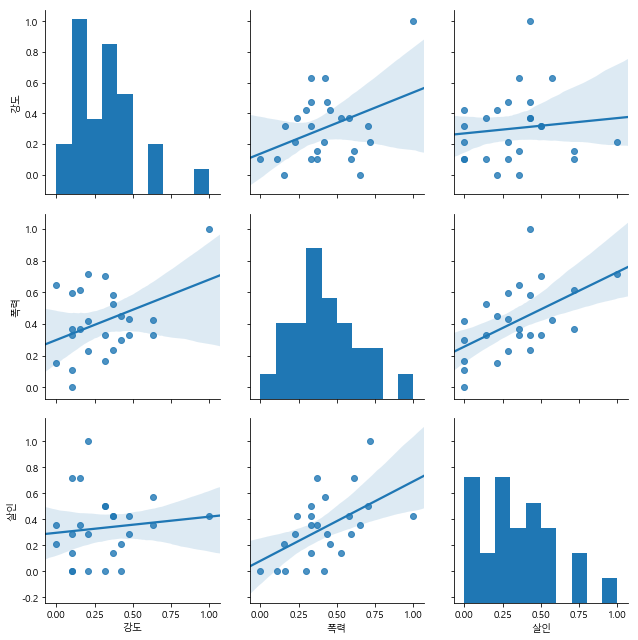

In [94]:
# 변수간의 상관성 => 산포행렬
# 범죄들간의 연관성
sns.pairplot( crime_anal_norm, vars = ['강도','폭력','살인'], size=3, kind='reg' )
plt.show()

# 폭력과 살인 연관성이 있다.

In [95]:
# X: 인구수, CCTV   Y: 강도검거율, 폭력검거율

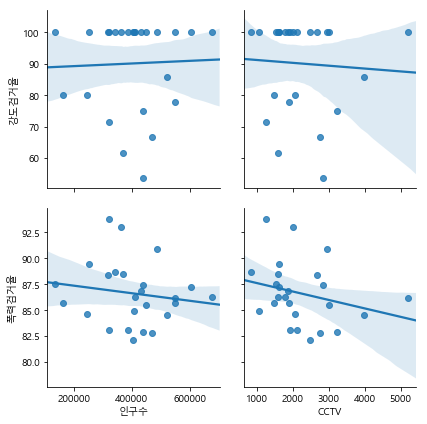

In [96]:
sns.pairplot( crime_anal_norm,
             x_vars=['인구수','CCTV'],
             y_vars=['강도검거율','폭력검거율'], 
             size=3,kind='reg')
plt.show()
# 인구수와 cctv수는 검거율과 관련이 없다.
# 원 cctv의 목적은 예방에 초점이 맞춰져 있고, 검거 자체는 인구와 상관없는 요인들의 영향을 받는다.

In [97]:
# 검거 항목의 최대값(최고값) 100으로 한정하고, 그 기준을 값을 배치 
crime_anal_norm['검거']

자치구
강남구     412.122106
강동구     442.771638
강북구     401.440707
강서구     426.257361
관악구     401.230996
광진구     365.714707
구로구     363.474489
금천구     436.838689
노원구     398.822941
도봉구     454.589019
동대문구    440.015847
동작구     378.290841
마포구     408.898919
서대문구    431.173803
서초구     347.578202
성동구     419.346009
성북구     415.304730
송파구     415.378636
양천구     352.060974
영등포구    375.538577
용산구     399.557684
은평구     450.817072
종로구     345.553301
중구      291.493748
중랑구     421.638733
Name: 검거, dtype: float64

In [98]:
# 위의 최대값 구하기
crime_anal_norm['검거'].max()

# 최대값을 이용해 정규화 시킴
# 정규화 => 값을 동일 범위 내로 배치
crime_anal_norm['검거'] = crime_anal_norm['검거']/crime_anal_norm['검거'].max() *100

In [99]:
crime_anal_norm['검거']

자치구
강남구      90.658174
강동구      97.400425
강북구      88.308492
강서구      93.767633
관악구      88.262360
광진구      80.449525
구로구      79.956724
금천구      96.095302
노원구      87.732638
도봉구     100.000000
동대문구     96.794209
동작구      83.216010
마포구      89.949141
서대문구     94.849146
서초구      76.459876
성동구      92.247281
성북구      91.358285
송파구      91.374543
양천구      77.445992
영등포구     82.610569
용산구      87.894267
은평구      99.170251
종로구      76.014441
중구       64.122479
중랑구      92.751632
Name: 검거, dtype: float64

In [100]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
자치구,,,,,,,,,,,,,,
도봉구,0.000000,0.105263,0.000000,0.000000,0.000000,100.000000,100.0,100.0,65.876777,88.712242,341649,858,0.105263,100.000000
은평구,0.250497,0.157895,0.357143,0.301962,0.369904,92.608696,100.0,100.0,67.339582,90.868794,487666,2962,1.437401,99.170251


In [101]:
# 히트맵을 통해서 검거율을 보여주겠다.
# y: 자치구, x: xx검거율
# 데이터로 사용 crime_anal_norm_sort

In [102]:
crime_anal_norm_sort[cols]

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,
도봉구,100.000000,100.000000,100.000000,65.876777,88.712242
은평구,92.608696,100.000000,100.000000,67.339582,90.868794
강동구,98.255814,100.000000,100.000000,57.689970,86.825854
동대문구,90.303030,100.000000,90.909091,65.740142,93.063584
금천구,88.333333,100.000000,100.000000,59.070990,89.434365
서대문구,89.603960,100.000000,100.000000,58.455285,83.114558
강서구,80.063291,100.000000,100.000000,58.951271,87.242798
중랑구,83.720930,100.000000,100.000000,53.033268,84.884535
성동구,80.303030,100.000000,100.000000,50.652985,88.389994


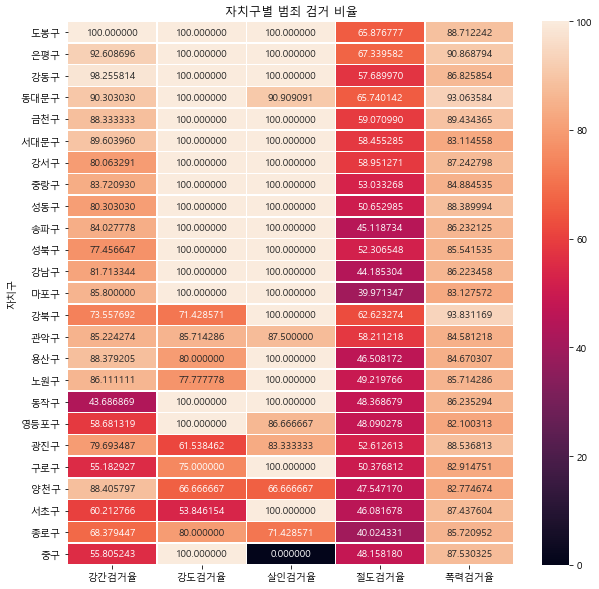

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap( crime_anal_norm_sort[cols] ,annot=True, fmt='f', linewidths=.5 )#cmap='RdPu')    # linewidths : 간격 조정, cmap: 색상
plt.title('자치구별 범죄 검거 비율')
plt.show()

In [104]:
# 범죄 발생 통계
# y: 자치구(범죄비율이 높은수),  x: 5대 범죄
# 히트맵 표현

gg

### 지도 시각화 ( 공간 시각화의 한 범주 )

- folium을 이용하고, geoJson 데이터를 이용하여 지도상에 행정구역을 표현
- 구역별 정보를 시각화 한다.
- 연습 : 미국 지도에 실업율 데이터를 가지고 확인
- 적용 : 서울시 지도에 경찰서 표시, 검거율, 발생율, 다른 행정구역의 칼라맵 적용, 마커를 통해 포인트 설정 및 폴리곤표현으로
         검거율은 표시
- 응용 : 주유소 정보 데이터 부산시 행정구역으로 표현, 자치구별 가장 저렴한 주유소 마킹, 행정구역별 주유가격 평균을 통해서
         칼라맵으로 표시, 브랜드별(6개) 알뜰주유소 -> 브랜드 대비, 진짜 저렴한지 체크하기
- 연습 >> Folium_basic에서 

In [ ]:
# 실전
# 서울을 행정구역으로 나눠서 드로잉  -> 자치구역 드로잉


In [108]:
import folium
import pandas as pd

In [126]:
# 한글 경우 인코딩 처리해서 지도에 데이터로 삽입
geo_str = json.load( open( '../data/seoul.json', encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [120]:
state_data = pd.read_csv('../data/seoul_crime/2017.csv', encoding= 'Euc-Kr')
state_data.head(2)

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0


In [137]:
map_seoul = folium.Map( location = gps, zomm_start=20)
map_seoul

In [141]:
gps = [ 37.552949,126.9902653 ]
map_seoul = folium.Map( location = gps, zomm_start=11)
map_seoul.choropleth(geo_data= geo_str 
                    ,data=crime_anal_norm
                    ,columns=[ crime_anal_norm.index, '범죄']
                    ,key_on='feature.id'
                    ,fill_color='YlGn'
                    ,legend_name='서울시 자치구별 범죄비율'
                    )
map_seoul

In [142]:
# 실습
# 범죄 값을 정규화해서 다시 시각화
# 최대값은 5.0
# 범죄발생율 = 범죄값/5.0 *100
# 컬러는 'PuRd'

In [150]:
crime_anal_norm['범죄발생율']=crime_anal_norm['범죄']/5*100
crime_anal_norm['범죄발생율'].head(2)

자치구
강남구    88.571429
강동구    34.677978
Name: 범죄발생율, dtype: float64

In [153]:
gps = [ 37.552949,126.9902653 ]
map_seoul = folium.Map( location = gps, zomm_start=11)
map_seoul.choropleth(geo_data= geo_str 
                    ,data=crime_anal_norm
                    ,columns=[ crime_anal_norm.index, '범죄발생율']
                    ,key_on='feature.id'
                    ,fill_color='PuRd'
                    ,legend_name='서울시 자치구별 범죄발생율'
                    )
map_seoul

-------------------------------강사님 코드 -------------------------------------

In [176]:
# 범죄값을 정규화하여  다시 시도한다 
# 최대값은 5.0 기준으로 정규화 처리후 
# 범죄발생율=범죄/5.0 * 100
# 칼라는 PuRd
tmp = crime_anal_norm['범죄']/crime_anal_norm['범죄'].max() * 100
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
map_seoul.choropleth( geo_data=geo_str
                   ,data=tmp 
                   ,columns=[ crime_anal_norm.index, tmp ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 범죄비율'
                 )
map_seoul

-------------------------------------.-.------------------------------------

In [ ]:
# 실습1)
# 인구수 대비 범죄를 계산하여 범죄발생율 대입
# 범죄발생율 = 범죄/인구수*100
# 칼라는 PuRd

In [ ]:
# 실습2)
# 인구수 대비 범죄를 계산하여 범죄발생율 대입
# 범죄발생율 = 5대범죄(순수카운트)/인구수*100
# 칼라는 PuRd

In [172]:
# 실습1
crime_anal_norm['범죄발생율1'] = crime_anal_norm['범죄']/crime_anal_norm['인구수']*100

In [175]:
# 실습1
gps = [ 37.552949,126.9902653 ]
map_seoul = folium.Map( location = gps, zomm_start=11)
map_seoul.choropleth(geo_data= geo_str 
                    ,data=crime_anal_norm
                    ,columns=[ crime_anal_norm.index, '범죄발생율1']
                    ,key_on='feature.id'
                    ,fill_color='PuRd'
                    ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                    )
map_seoul
# 인구대비 범죄비율은 종로구가 1위를차지
# 강남구는 그럼에도 불구하고 상위권에서 3위

C:\Users\User\Anaconda3\envs\analysis\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# 실습1)
-------------------------------강사님 코드 -------------------------------------

In [177]:
tmp = crime_anal_norm['범죄']/crime_anal_norm['인구수'] * 100
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
map_seoul.choropleth( geo_data=geo_str
                   ,data=tmp 
                   ,columns=[ crime_anal_norm.index, tmp ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 )
map_seoul

-------------------------------------.-.------------------------------------

# 실습2)

In [180]:
# 십습2)
# 컬럼 값들 더하기
np.sum(crime_anal[ crime_anal.columns[:5]], axis=1)

자치구
강남구     7720
강동구     4261
강북구     3393
강서구     5135
관악구     5525
광진구     4646
구로구     4895
금천구     3265
노원구     4209
도봉구     1999
동대문구    3975
동작구     3330
마포구     5278
서대문구    3113
서초구     4708
성동구     2767
성북구     3434
송파구     5576
양천구     3882
영등포구    5969
용산구     4060
은평구     3883
종로구     4057
중구      4184
중랑구     4571
dtype: int64

In [185]:
# 실습2)
tmp.pop = np.sum(crime_anal[ crime_anal.columns[:5]], axis=1)

In [187]:
# 실습2)
tmp = tmp.pop/crime_anal_norm['인구수'] * 100
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
map_seoul.choropleth( geo_data=geo_str
                   ,data=tmp
                   ,columns=[ crime_anal_norm.index, tmp ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 )
map_seoul
# 종로구가 실질적인 범죄 우발지역 자치구이다.

 실습2 끝

## 경찰서별 검거현황과 자치구별 범죄 발생현황을 표현
- 경찰서를 마킹  
- 검거(순수카운트, 총량)를 서클마커 표시 => 작으면 적당히 스케일을 키운다.
- 범죄(총량) 자치구별 색상표시

In [218]:
gps = [ 37.552949,126.9902653 ]
gps1 = crime_data['위도']+','+crime_data['경도']
zoom = 10

In [200]:
crime_data
# 관할서
crime_data.index

(31,)

In [201]:
crime_data['위도'],crime_data['경도']

(구분
 강남      37.5093899463715
 강동      37.5286763457485
 강북       37.637408362838
 강서      37.5397837301896
 관악      37.4745875338795
 광진      37.5428136101647
 구로      37.4948844667899
 금천     37.45725314643252
 남대문     37.5549786547527
 노원      37.6423345266253
 도봉      37.6533976253312
 동대문     37.5850804205685
 동작      37.5131469479959
 마포      37.5510118582052
 방배     37.48155944749938
 서대문     37.5649023404956
 서부     37.61273115700761
 서초      37.4956126696023
 성동      37.5617947420747
 성북      37.5897697305228
 송파      37.5019775317251
 수서      37.4934972653425
 양천      37.5165549067037
 영등포       37.52585220719
 용산      37.5411811395942
 은평      37.6285242467996
 종로      37.5755413947569
 종암       37.602095614954
 중랑      37.6182390801576
 중부      37.5636199296203
 혜화      37.5718915247338
 Name: 위도, dtype: object, 구분
 강남       127.067070541137
 강동       127.126894359114
 강북       127.027340967017
 강서       126.829985881518
 관악       126.951062346192
 광진       127.083842771963

In [209]:
map_police = folium.Map( location=gps, zoom_start=zoom)#, tiles='Stamen Terrain' )
# 마커
for ch in gps1
    folium.Marker(gps, popup = crime_data.index[%s], icon=folium.Icon(icon='cloud')).add_to(map_centom)  #add_to를 통해 map_cemtom  과 연관성부여

map_police

ValueError: Expected two (lat, lon) values for location, instead got: 구분
강남        37.5093899463715,127.067070541137
강동        37.5286763457485,127.126894359114
강북         37.637408362838,127.027340967017
강서        37.5397837301896,126.829985881518
관악        37.4745875338795,126.951062346192
광진        37.5428136101647,127.083842771963
구로        37.4948844667899,126.886660285169
금천     37.45725314643252,126.89674921449215
남대문       37.5549786547527,126.973499492486
노원        37.6423345266253,127.071404832413
도봉        37.6533976253312,127.052708256522
동대문       37.5850804205685,127.045762797538
동작        37.5131469479959,126.942857105642
마포         37.5510118582052,126.95394117396
방배     37.48155944749938,126.98300906928465
서대문       37.5649023404956,126.966790740735
서부      37.61273115700761,126.9276766277499
서초         37.4956126696023,127.00528776133
성동        37.5617947420747,127.036472076258
성북        37.5897697305228,127.016254625261
송파        37.5019775317251,127.127161296581
수서        37.4934972653425,127.077143044327
양천        37.5165549067037,126.865542970902
영등포          37.52585220719,126.90094457988
용산        37.5411811395942,126.967778896191
은평        37.6285242467996,126.928631038584
종로        37.5755413947569,126.984898618166
종암         37.602095614954,127.032233767891
중랑         37.6182390801576,127.10454224897
중부         37.5636199296203,126.98959144113
혜화        37.5718915247338,126.998935936567
dtype: object.

# --------------------------------강사님 코드 ------------------------------------------

In [230]:
# 5대 범죄에 대한 총량
tmp_pop = np.sum( crime_anal[ crime_anal.columns[:5] ], axis=1 )

In [244]:
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
folium.Choropleth( geo_data=geo_str
                   ,name='choropleth'
                   ,data=tmp_pop 
                   ,columns=[ crime_anal_norm.index, tmp_pop ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 ).add_to(map_seoul)
map_seoul

# 경찰서 마커 
for idx in range(len(crime_data.index)  ):
         # 경찰서 위치정보 획득
         tmp_gps = [crime_data['위도'][idx],crime_data['경도'][idx]]
         #마킹
         folium.Marker(tmp_gps, popup ='서울%s경찰서' %crime_data.index[idx], 
                       icon=folium.Icon(icon='info-sign', color='red')).add_to(map_seoul)
    
map_seoul

In [245]:
# 업데이트 버전

In [248]:
# 5대 범죄에 대한 총량
tmp_pop = np.sum( crime_anal[ crime_anal.columns[:5] ], axis=1 )

In [249]:
# 검거 컬럼만 뽑기 ==> 범위를 그려야하는데 범위에 맞게 총량을 계산하기위해
cols = list(filter( lambda x: x.find('검거')>0, crime_data.columns ) )

In [250]:
# 범죄의 총량을 구하는 부분
tmp_catch = np.sum( crime_data[cols], axis=1 )
tmp_catch[:2]

구분
강남    3117
강동    3245
dtype: int64

In [263]:
# 서클의 크기가 너무 크면 애매하므로, 크기를 최대 10으로 제한하겠다.
# 0 - 10
tmp_catch= tmp_catch/tmp_catch.max() * 30

In [264]:
map_seoul = folium.Map( location=gps, zoom_start=10)
# 행정구역을 표현
folium.Choropleth( geo_data=geo_str
                   ,name='choropleth'
                   ,data=tmp_pop 
                   ,columns=[ crime_anal_norm.index, tmp_pop ]
                   ,key_on='feature.id'
                   ,fill_color='PuRd'
                   ,legend_name='서울시 자치구별 인구대비 범죄비율(5대범죄가중치동일)'
                 ).add_to(map_seoul)
# 경찰서 마커 
for idx in range( len(crime_data.index) ):
    # 경찰서 위치 정보 획득
    tmp_gps = [crime_data['위도'][idx],crime_data['경도'][idx]]
    # 마킹
    folium.Marker( tmp_gps, popup='서울%s경찰서' % crime_data.index[idx], 
                   icon=folium.Icon(icon='info-sign', color='red') ).add_to(map_seoul)
    folium.CircleMarker( tmp_gps, 
                         radius=tmp_catch[idx], 
                         popup='%s서 검거량' % crime_data.index[idx], 
                         color='#000000', fill_color='#ffffff' ).add_to(map_seoul)
map_seoul

# --------------------------------------------------.-.------------------------------------------------